In [6]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
path = "./gene_embedding_analysis/top1000pairs_corr_positive.ver2.tsv"

In [8]:
df = pd.read_csv(path, delimiter="\t", header=None)

In [9]:
df.columns = ["Genes", "Corr", "Labels"]

In [10]:
df

Genes      Corr  Labels
0    ('ENSG00000001629', 'ENSG00000140718')  0.886503       1
1    ('ENSG00000001629', 'ENSG00000110075')  0.885919       1
2    ('ENSG00000002016', 'ENSG00000179532')  0.876782       1
3    ('ENSG00000004534', 'ENSG00000115464')  0.875645       0
4    ('ENSG00000001629', 'ENSG00000077254')  0.873854       1
..                                      ...       ...     ...
995  ('ENSG00000000457', 'ENSG00000179532')  0.703682       0
996  ('ENSG00000004897', 'ENSG00000197937')  0.703580       1
997  ('ENSG00000147140', 'ENSG00000167088')  0.703576       1
998  ('ENSG00000005801', 'ENSG00000136381')  0.703547       1
999  ('ENSG00000000938', 'ENSG00000163131')  0.703518       1

[1000 rows x 3 columns]

In [11]:
y = df["Labels"].to_numpy()

In [12]:
scores = df["Corr"].to_numpy()

In [13]:
fpr, tpr, thresholds = roc_curve(y, scores)

In [14]:
def plot_auc(fpr, tpr):

    # Compute the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

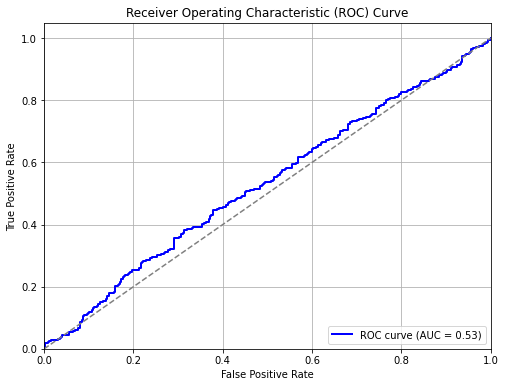

In [15]:
plot_auc(fpr, tpr)

In [16]:
from sklearn.metrics import precision_recall_curve

In [17]:
precision, recall, thresholds = precision_recall_curve(y, scores)

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

def plot_precision_recall(precision, recall):
    # Compute the AUC (Area Under the Curve) for the PR curve
    pr_auc = auc(recall, precision)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()


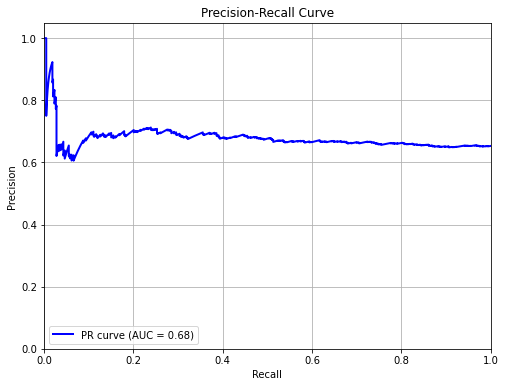

In [19]:
plot_precision_recall(precision, recall)